# 9기 3주차 과제 정답

In [1]:
!pip3 install numpy 
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn 
!pip3 install scikit-learn
!pip3 install scipy

## 1. y=10+9X+e에 해당하는 자료(산점도) 구성하기.

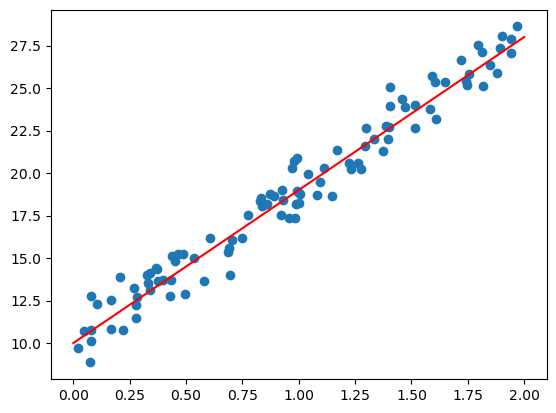

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 난수생성 시드 9
np.random.seed(9)

# 직선식 작성 y=10+9X+e
X=2*np.random.rand(100,1)
e=np.random.randn(100,1)
y=10+9*X+e

# 산점도 그리기
plt.scatter(X,y)

# 과제1 정답
x_line = np.array([0, 2])
y_line = 10 + 9 * x_line

plt.plot(x_line, y_line, color='red');

## scikit-learn LinearRegression을 이용해 캘리포니아 중간주택가격(='MedHouseVal') 예측
##### **보스턴데이터는 주택가격 데이터셋이 1.2버전부터 제거되어 캘리포니아로 대체

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
%matplotlib inline

# california 데이타셋 로드
housing = fetch_openml(name="house_prices", as_frame=True)

# california 데이타셋 DataFrame 변환
california = fetch_california_housing(as_frame=True)
californiaDF = california['frame']
californiaDF.head()

/Users/jintaewan/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


* MedInc: 중간 소득  
* HouseAge: 주택 연식  
* AveRooms: 평균 방 수  
* AveBedrms: 평균 침실 수  
* Population: 인구  
* AveOccup: 평균 자가 비율  
* Latitude: 위도  
* Longitude: 경도  
* MedHouseVal: 주택 가격의 중앙값  

### 산점도를 통해 회귀직선 표현

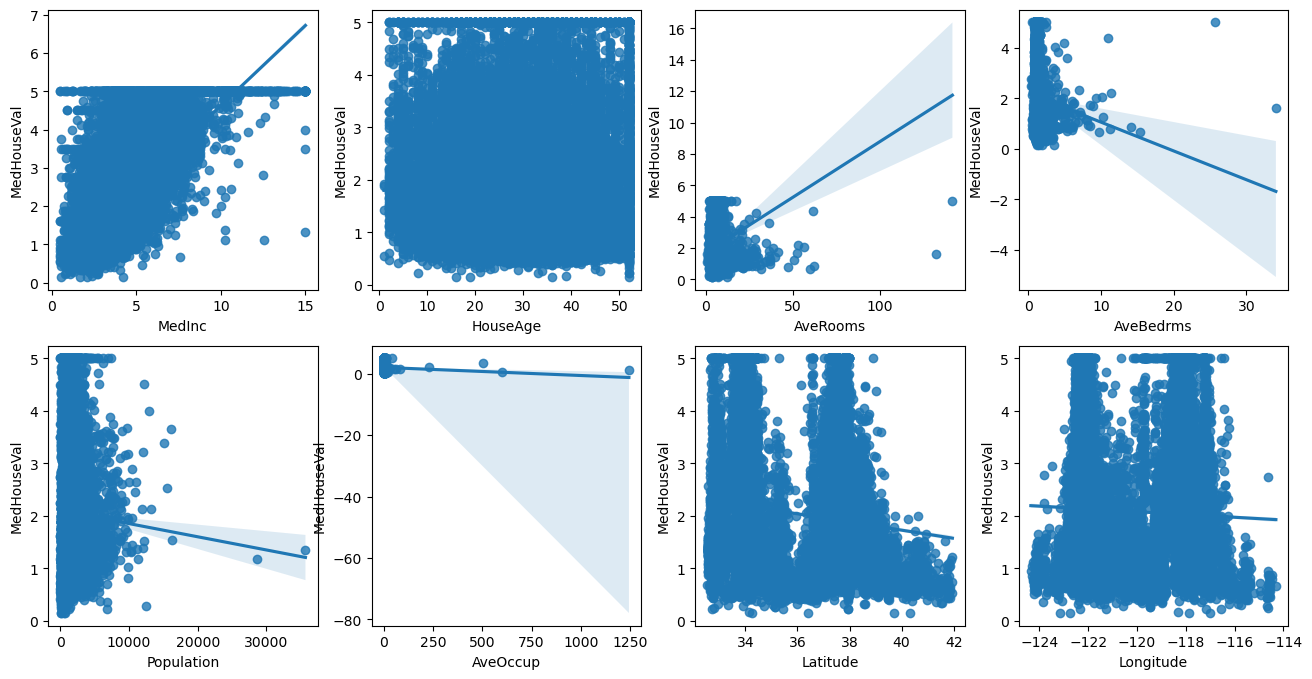

In [6]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms', 'AveBedrms','Population', 'AveOccup',
               'Latitude', 'Longitude']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='MedHouseVal', data=californiaDF, ax=axs[row][col])


### 2. y_target에는 'MedHouseVal', X_data에는 'MedHouseVal'를 제외한 나머지 피처를 이용하여 다중회귀 모델 만들기

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 과제 2 정답
# 데이터 준비
# y_target은 'MedHouseVal', X_data은 'MedHouseVal'이외 칼럼들로 설정
y_target = californiaDF['MedHouseVal']
X_data =  californiaDF.drop(['MedHouseVal'], axis=1, inplace=False)

# 데이터 분할 
# Test Size는 0.3으로 (난수는 자유)
X_train , X_test , y_train , y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=100)

# Linear Regression OLS로 학습/예측/평가 수행 
# 모델 생성
lr = LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# MSE값 출력
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 0.500 , RMSE : 0.707
Variance score : 0.622


In [9]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -37.13412182840414
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [10]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

##### MedHouseVal = - 37.239 + AveBedrms\*0.6 + MedInc\*0.4 + AveRooms*-0.1 + Latitude*-0.4 + Longitude*-0.4 

## 3. 릿지회귀

In [11]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 
# X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge

# 과제3 정답
# 릿지회귀 모형 생성. alpha=10
ridge = Ridge(alpha = 10)

# 학습
ridge.fit(X_train, y_train)

# 예측
y_pred = ridge.predict(X_test)

# 평가 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}'. format(mse))
print('RMSE:{0:.3f}'. format(rmse))

MSE: 0.501
RMSE:0.708


## 4. MAE가 아닌 RMSE를 사용하는 이유는 무엇인가요?

MAE는 실제 값과 예측값의 차이를 절댓값으로 변환해 평균낸 것입니다.   
MAE는 다른 지표들에 비해 직관적이라는 특징을 가지고 있는데, 이러한 장점을 가진 MAE가 아닌 RMSE를 사용하는 이유는 무엇인지 설명해주세요.

MAE는 절댓값을 사용하기 때문에 실제 정답보다 얼마나 낮게 혹은 높게 예측했는지 파악하기 어렵고, 이동거리가 일정하기에 최적값에 수렴하기 어렵다. 반면 RMSE는 루트를 씌워 계산하므로 값이 커지는 단점을 해결할 수 있고, 이상치에 상대적으로 덜 민감하기 때문에 일반화하기에 더욱 적절하다

## 5.편향-분산 트레이드 오프에 대해서 자세히 설명후 해결방안을 찾아주세요

### 5-1. 편향 분산의 차이점을 과대과소 적합을 활용하여 설명해주세요  

편향이 높다면 과소적합 문제가, 분산이 높다면 과대적합 문제가 발생할 가능성이 있다는 차이점이 있다.

### 5-2. 트레이드 오프 문제점 해결 방안을 서술해주세요

편향이 큰 경우 더 많은 데이터를 학습시켜 여러 패턴을 파악하고, 편향을 낮추는 방향으로 문제 해결이 가능하다. 또한 혼합모형과 앙상블 학습을 통해 문제를 해결할 수 있다